In [33]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_pd = pd.read_csv(city_data_to_load)
ride_data_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_pd = pd.merge(city_data_pd, ride_data_pd, on="city")

# Display the data table for preview
merged_pd.head(10)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [34]:
merged_pd["Ride count"] = 1
cities_grouped = merged_pd.groupby(["city"])
cities_fare = cities_grouped.sum()
cities_fare = cities_fare.drop(["driver_count", "ride_id"], axis=1)
cities_fare_merged = pd.merge(cities_fare, city_data_pd, on="city")
cities_fare_merged["average_fare"] = cities_fare_merged["fare"] / cities_fare_merged["Ride count"]
cities_fare_merged

,city,fare,Ride count,driver_count,type,average_fare
0,Amandaburgh,443.55,18,12,Urban,24.641667
1,Barajasview,557.31,22,26,Urban,25.332273
2,Barronchester,582.76,16,11,Suburban,36.422500
3,Bethanyland,593.21,18,22,Suburban,32.956111
4,Bradshawfurt,400.64,10,7,Rural,40.064000
5,Brandonfort,673.31,19,10,Suburban,35.437368
6,Carriemouth,764.49,27,52,Urban,28.314444
7,Christopherfurt,661.55,27,41,Urban,24.501852
8,Colemanland,679.68,22,23,Suburban,30.894545
9,Davidfurt,543.93,17,23,Suburban,31.995882


## Bubble Plot of Ride Sharing Data

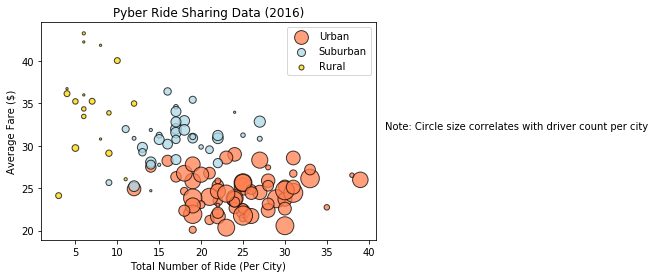

In [35]:
# Obtain the x and y coordinates for each of the three city types
#urban
urban_scatter = cities_fare_merged.loc[cities_fare_merged["type"] == "Urban", :]
suburban_scatter = cities_fare_merged.loc[cities_fare_merged["type"] == "Suburban", :]
rural_scatter = cities_fare_merged.loc[cities_fare_merged["type"] == "Rural", :]

# Build the scatter plots for each city types

plt.scatter(urban_scatter["Ride count"], urban_scatter["average_fare"], marker="o", facecolor="coral", edgecolors="black",s=urban_scatter["driver_count"]*5, alpha=0.75)
plt.scatter(suburban_scatter["Ride count"], suburban_scatter["average_fare"], marker="o", facecolor="lightblue", edgecolors="black",s=suburban_scatter["driver_count"]*5, alpha=0.75)
plt.scatter(rural_scatter["Ride count"], rural_scatter["average_fare"], marker="o", facecolor="gold", edgecolors="black",s=rural_scatter["driver_count"]*5, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend

plt.legend(["Urban", "Suburban", "Rural"], loc="upper right")

# Incorporate a text label regarding circle size

plt.text(42, 32, "Note: Circle size correlates with driver count per city")

# Save Figure

plt.savefig("scatterplot.png")



In [36]:
# Show plot
plt.show()

## Total Fares by City Type

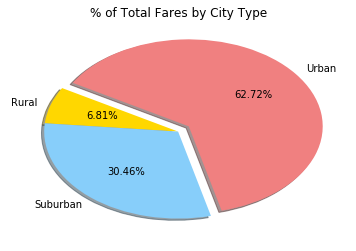

In [37]:
# Calculate Type Percents

fares_pie_info = merged_pd[["type","fare"]]
total_fare = merged_pd["fare"].sum()
fares_pie_info= fares_pie_info.groupby("type")
fares_pie_info = fares_pie_info.sum()
fares_pie_info["percentage"] = fares_pie_info["fare"] / total_fare * 100


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = fares_pie_info["percentage"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Save Figure

plt.savefig("percenttotalfares.png")


In [38]:
# Show Figure
plt.show()

## Total Rides by City Type

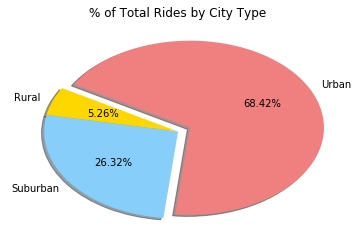

In [48]:
# Calculate Ride Percents

total_rides = cities_fare_merged["Ride count"].sum()
#total_rides

rides_pie_info = merged_pd[["type","fare"]]
rides_pie_info["Ride count"] = 1
rides_pie_info = rides_pie_info.groupby("type")
rides_pie_info = rides_pie_info.sum()
rides_pie_info["percentage"] = rides_pie_info["Ride count"] / total_rides * 100
#rides_pie_info
# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
sizes = rides_pie_info["percentage"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

rides_pie_info
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("percenttotalrides.png")


In [23]:
# Show Figure
plt.show()

## Total Drivers by City Type

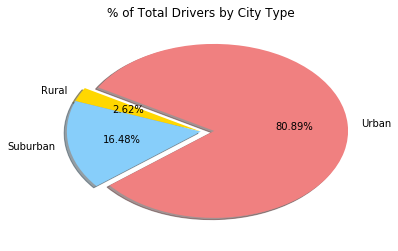

In [109]:
# Calculate Driver Percents
driver_pie = city_data_pd[["driver_count","type"]]
total_drivers = driver_pie["driver_count"].sum()
driver_pie = driver_pie.groupby(["type"])
driver_pie = driver_pie.sum()
driver_pie["percentage"] = driver_pie["driver_count"] / total_drivers * 100
driver_pie
# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]
sizes = driver_pie["percentage"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")


# Save Figure

plt.savefig("percenttotaldrivers.png")


In [110]:
# Show Figure
plt.show()